In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
import warnings
from collections import Counter

In [2]:
df = pd.read_csv('full3.csv') 
print(df.shape)
df=df.dropna()
df.isna().any()
Counter(df["PCOS"])

(540, 11)


Counter({1: 220, 0: 320})

In [3]:
df.dtypes

PCOS                      int64
Age (yrs)                 int64
BMI                     float64
Cycle(R/I)                int64
Weight gain(Y/N)          int64
hairgrowth(Y/N)           int64
Skin darkening (Y/N)      int64
Hair loss(Y/N)            int64
Pimples(Y/N)              int64
Fast food (Y/N)           int64
Reg.Exercise(Y/N)         int64
dtype: object

In [3]:
target_column = ['PCOS'] 
predictors = list(set(list(df.columns))-set(target_column))
df[predictors] = df[predictors]/df[predictors].max()
df.describe().transpose()

count      mean       std       min       25%       50%  \
PCOS                  540.0  0.407407  0.491807  0.000000  0.000000  0.000000   
Age (yrs)             540.0  0.652508  0.119121  0.020833  0.562500  0.645833   
BMI                   540.0  0.089762  0.042012  0.048246  0.078572  0.087469   
Cycle(R/I)            540.0  0.648148  0.228523  0.500000  0.500000  0.500000   
Weight gain(Y/N)      540.0  0.427778  0.495215  0.000000  0.000000  0.000000   
hairgrowth(Y/N)       540.0  0.357407  0.479681  0.000000  0.000000  0.000000   
Skin darkening (Y/N)  540.0  0.370370  0.483352  0.000000  0.000000  0.000000   
Hair loss(Y/N)        540.0  0.437037  0.496480  0.000000  0.000000  0.000000   
Pimples(Y/N)          540.0  0.396296  0.489581  0.000000  0.000000  0.000000   
Fast food (Y/N)       540.0  0.416667  0.493464  0.000000  0.000000  0.000000   
Reg.Exercise(Y/N)     540.0  0.246296  0.431253  0.000000  0.000000  0.000000   

                           75%  max  
PCOS                  1.000000  1.0  
Age (yrs)             0.729167  1.0  
BMI                   0.096244  1.0  
Cycle(R/I)            1.000000  1.0  
Weight gain(Y/N)      1.000000  1.0  
hairgrowth(Y/N)       1.000000  1.0  
Skin darkening (Y/N)  1.000000  1.0  
Hair loss(Y/N)        1.000000  1.0  
Pimples(Y/N)          1.000000  1.0  
Fast food (Y/N)       1.000000  1.0  
Reg.Exercise(Y/N)     0.000000  1.0

In [4]:
X = df[predictors].values
y = df[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)
print(X_train.shape); print(X_test.shape)


(432, 10)
(108, 10)


In [5]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)


In [6]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7685185185185185


In [7]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=6)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8333333333333334


In [8]:
y_pred=clf.predict(X_test)
y_pred = (y_pred>0.5)

[Text(0, 0.5, 'No'), Text(0, 1.5, 'Yes')]

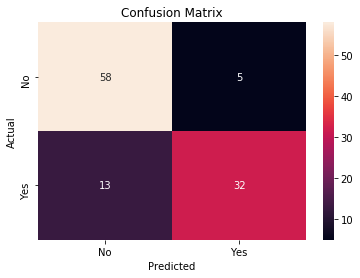

In [9]:
from sklearn.metrics import confusion_matrix
cn = confusion_matrix(y_test,y_pred)
ax =plt.subplot()
sns.heatmap(cn,annot =True,ax = ax);

ax.set_xlabel('Predicted') ; ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(('No','Yes')); ax.yaxis.set_ticklabels(('No','Yes'))

In [10]:
import pickle
import joblib
filenames = 'Pcos.pkl'
joblib.dump(clf,filenames)

['Pcos.pkl']